In [6]:
import pandas as pd
import statsmodels.api as sm

In [7]:
users_df = pd.read_csv('users.csv')
repos_df = pd.read_csv('repositories.csv')

In [8]:
# 1. Top 5 users in Tokyo with the highest number of followers
top_users_five_tokyo = users_df.sort_values(by='followers', ascending=False).head(5)['login'].tolist()
print("Ans 1: Top 5 users with the highest number of followers:", ", ".join(top_users_five_tokyo))

Ans 1: Top 5 users with the highest number of followers: dennybritz, wasabeef, dai-shi, rui314, domenic


In [9]:
# 2. 5 earliest registered GitHub users in Tokyo
earliest_users_five_tokyo = users_df.sort_values(by='created_at', ascending=True).head(5)['login'].tolist()
print("Ans 2: 5 earliest registered GitHub users:", ", ".join(earliest_users_five_tokyo))

Ans 2: 5 earliest registered GitHub users: kana, naoya, ko1, amatsuda, masuidrive


In [10]:
# 3. 3 most popular licenses among these users
repos_with_license = repos_df[repos_df['license_name'].notnull()]
top_3_licenses = repos_with_license['license_name'].value_counts().head(3).index.tolist()
print("Ans 3 : Top 3 most popular licenses:", ", ".join(top_3_licenses))

Ans 3 : Top 3 most popular licenses: mit, other, apache-2.0


In [11]:
# 4. Which company do the majority of these developers work at?
users_with_company = users_df[users_df['company'].notnull()].copy()  
users_with_company.loc[:, 'company'] = users_with_company['company'].str.strip().str.lstrip('@').str.upper()
most_common_company = users_with_company['company'].value_counts().idxmax()
print("Majority of these developers work at:", most_common_company)

Majority of these developers work at: CYBERAGENT, INC.


In [12]:
# 5. Which programming language is most popular among these users?
repos_with_language = repos_df[repos_df['language'].notnull()]
most_common_language = repos_with_language['language'].value_counts().idxmax()
print("Ans 5 : Most popular programming language:", most_common_language)

Ans 5 : Most popular programming language: JavaScript


In [13]:
# 6. Which programming language is the second most popular among users who joined after 2020?
users_df['created_at'] = pd.to_datetime(users_df['created_at'], utc=True)  
comparison_date = pd.to_datetime('2020-01-01').tz_localize('UTC')
users_after_2020 = users_df[users_df['created_at'] > comparison_date]
second_most_common_language = repos_df[repos_df['language'].notnull() & repos_df['login'].isin(users_after_2020['login'])]['language'].value_counts().nlargest(2).idxmin()
print("Ans 6 : Second most popular language among users who joined after 2020:", second_most_common_language)

Ans 6 : Second most popular language among users who joined after 2020: JavaScript


In [14]:
# 7. Which language has the highest average number of stars per repository?
avg_stars_per_language = repos_df.groupby('language')['stargazers_count'].mean().idxmax()
print("Ans 7 : Language with the highest average number of stars per repository:", avg_stars_per_language)

Ans 7 : Language with the highest average number of stars per repository: Assembly


In [15]:
# 8. Define leader_strength as followers / (1 + following). Top 5 in terms of leader_strength
users_df['leader_strength'] = users_df['followers'] / (1 + users_df['following'])
top_5_leader_strength = users_df.sort_values(by='leader_strength', ascending=False).head(5)['login'].tolist()
print("Ans 8 : Top 5 users in terms of leader_strength:", ", ".join(top_5_leader_strength))

Ans 8 : Top 5 users in terms of leader_strength: blueimp, dai-shi, asahilina, pilcrowonpaper, marcan


In [16]:
# 9. Correlation between the number of followers and the number of public repositories
correlation = users_df['followers'].corr(users_df['public_repos'])
print("Ans 9 : Correlation between followers and repos:", round(correlation, 3))

Ans 9 : Correlation between followers and repos: -0.134


In [17]:
# 10. Regression to estimate additional followers per additional public repository
X = users_df['public_repos']
y = users_df['followers']
X = sm.add_constant(X) 
model = sm.OLS(y, X).fit()
slope = model.params.iloc[1] 
print("Ans 10 : Regression slope of followers on repos:", round(slope, 3))

Ans 10 : Regression slope of followers on repos: -0.746


In [18]:
# 11. Correlation between projects_enabled and wiki_enabled
correlation_projects_wiki = repos_df['has_projects'].astype(int).corr(repos_df['has_wiki'].astype(int))
print("Ans 11 : Correlation between projects_enabled and wiki_enabled:", round(correlation_projects_wiki, 3))

Ans 11 : Correlation between projects_enabled and wiki_enabled: 0.475


In [19]:
# 12. Average following difference for hireable users
average_following_hireable = users_df[users_df['hireable'] == True]['following'].mean()
average_following_non_hireable = users_df[users_df['hireable'] == False]['following'].mean()
following_difference = average_following_hireable - average_following_non_hireable
print(f"Ans 12: Average following difference (hireable - non-hireable): {following_difference:.3f}")

Ans 12: Average following difference (hireable - non-hireable): nan


In [20]:
# 13. Regression slope of followers on bio length
users_df['bio_length'] = users_df['bio'].str.len() 
bio_length_correlation = users_df[users_df['bio'].notna()]['bio_length'].corr(users_df['followers'])
print(f"Ans 13 : Correlation of bio length with followers: {bio_length_correlation:.3f}")

Ans 13 : Correlation of bio length with followers: 0.134


In [21]:
filtered_users_df = users_df.dropna(subset=['followers', 'bio_length'])

y = filtered_users_df['followers']
X = sm.add_constant(filtered_users_df['bio_length'])

bio_model = sm.OLS(y, X).fit()
print(bio_model.summary())

                            OLS Regression Results                            
Dep. Variable:              followers   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.255
Date:                Mon, 21 Oct 2024   Prob (F-statistic):              0.267
Time:                        10:53:16   Log-Likelihood:                -631.77
No. Observations:                  71   AIC:                             1268.
Df Residuals:                      69   BIC:                             1272.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1629.1382    412.502      3.949      0.0

In [22]:
# 14. Users who created the most repositories on weekends (UTC)
repos_df['created_at'] = pd.to_datetime(repos_df['created_at']) 
repos_df['created_on_weekend'] = repos_df['created_at'].dt.dayofweek >= 5  
weekend_repos = repos_df[repos_df['created_on_weekend']]
top_users_weekend = weekend_repos['login'].value_counts().head(5).index.tolist()
print(f"Ans 14 : Top 5 users who created most repositories on weekends: {', '.join(top_users_weekend)}")

Ans 14 : Top 5 users who created most repositories on weekends: kana, ishkawa, smorimoto, hajimehoshi, wkentaro


In [23]:
# 15. Difference in email fractions for hireable and non-hireable users
fraction_email_hireable = users_df[users_df['hireable'] == True]['email'].notna().mean()
fraction_email_non_hireable = users_df[users_df['hireable'] == False]['email'].notna().mean()
email_fraction_difference = fraction_email_hireable - fraction_email_non_hireable
print(f"Ans 15 : Difference in email fractions (hireable - non-hireable): {email_fraction_difference:.3f}")

Ans 15 : Difference in email fractions (hireable - non-hireable): nan


In [24]:
# 16. Most common surname
users_df['surname'] = users_df['name'].str.split().str[-1]
common_surnames = users_df['surname'].value_counts()
most_common_surname = common_surnames.idxmax()
most_common_surname_count = common_surnames.max()
print(f"Ans 16 : Most common surname: {most_common_surname} with {most_common_surname_count} users")

Ans 16 : Most common surname: Wada with 2 users


In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

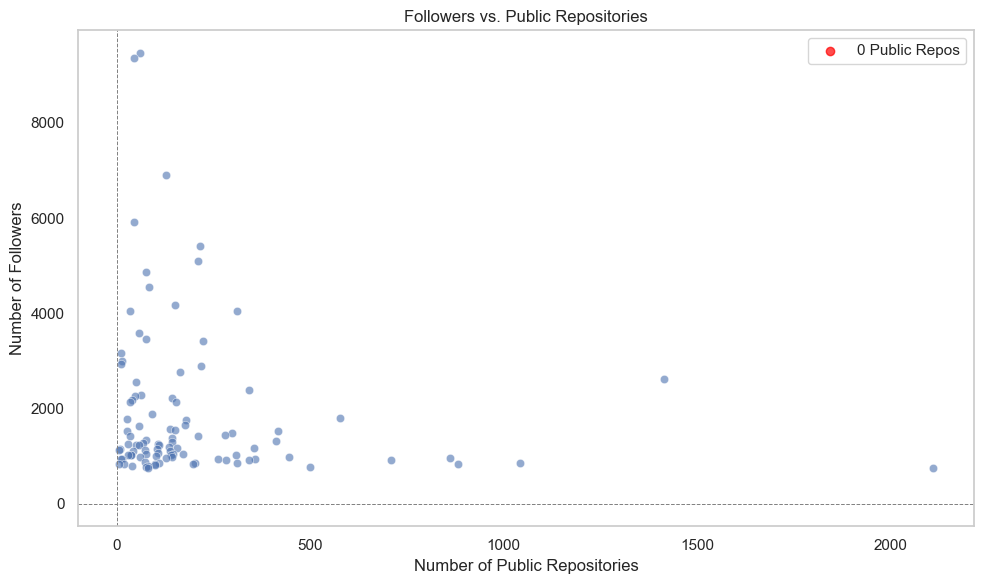

In [26]:
users_df = pd.read_csv('users.csv')
sns.set(style="whitegrid")

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=users_df, x='public_repos', y='followers', alpha=0.6)

# Highlight users with 0 public repositories
zero_repos = users_df[users_df['public_repos'] == 0]
plt.scatter(zero_repos['public_repos'], zero_repos['followers'], color='red', label='0 Public Repos', alpha=0.7)

# Customize the plot
plt.title('Followers vs. Public Repositories')
plt.xlabel('Number of Public Repositories')
plt.ylabel('Number of Followers')
plt.axhline(y=0, color='gray', linestyle='--', linewidth=0.7)  # Adding a horizontal line at y=0
plt.axvline(x=0, color='gray', linestyle='--', linewidth=0.7)  # Adding a vertical line at x=0
plt.legend()
plt.grid()

# Show the plot
plt.tight_layout()
plt.savefig('followers_vs_public_repos.png')  # Save the figure
plt.show()